# Lecture: Pandas in depth

In [1]:
import numpy as np
import pandas as pd

# Show me everything! 
# pd.options.display.max_rows = 999   
# pd.options.display.max_columns = 999 

## Data manipulations 

In [2]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
print(A)
print(B)

0    2
1    4
2    6
dtype: int64
1    1
2    3
3    5
dtype: int64


In [3]:
# similar to the numpy arrays and broadcasting 
print(A+B)

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64


In [4]:
C = np.random.randint(10, size=(3, 4))
print(C - C[0])

df = pd.DataFrame(C, columns=list('QRST'))
df - df.iloc[0]

[[ 0  0  0  0]
 [ 6  2 -1  8]
 [-2  6 -1  4]]


,Q,R,S,T
0,0,0,0,0
1,6,2,-1,8
2,-2,6,-1,4


In [5]:
df1 = pd.DataFrame({'A':A, 'B':B})
print(df * 5 + 2)

    Q   R   S   T
0  17  12  27   2
1  47  22  22  42
2   7  42  22  22


In [6]:
# Data from https://cneos.jpl.nasa.gov/fireballs/
df = pd.read_csv('cneos_fireball_data.csv')
df.head(5)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2020-11-07 21:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,1.110000e+11,0.330
1,2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,1.140000e+11,0.340
2,2020-10-23 20:51:39,30.0N,71.9W,48.0,NaN,NaN,NaN,NaN,8.000000e+10,0.250
3,2020-10-22 17:39:33,22.0N,133.5W,40.0,17.6,-9.4,14.1,-4.9,4.400000e+10,0.150
4,2020-10-21 18:57:33,12.9N,150.2W,NaN,NaN,NaN,NaN,NaN,2.200000e+10,0.079


In [7]:
# create new column from the transforming other columns
# def my_func: ...
df.assign(abs_velocity=lambda x: np.sqrt(x['vx']**2+x['vy']**2+x['vz']**2))

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),abs_velocity
0,2020-11-07 21:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,1.110000e+11,0.330,16.714365
1,2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,1.140000e+11,0.340,17.585790
2,2020-10-23 20:51:39,30.0N,71.9W,48.0,NaN,NaN,NaN,NaN,8.000000e+10,0.250,NaN
3,2020-10-22 17:39:33,22.0N,133.5W,40.0,17.6,-9.4,14.1,-4.9,4.400000e+10,0.150,17.640295
4,2020-10-21 18:57:33,12.9N,150.2W,NaN,NaN,NaN,NaN,NaN,2.200000e+10,0.079,NaN
...,...,...,...,...,...,...,...,...,...,...,...
842,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,NaN
843,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,NaN
844,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,NaN
845,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,NaN


In [8]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head(3)

# df['column_name'] is the same to df.column_name !!!
# planets['mass'] is planets.mass
# planets.mass

# What way is better to use? 

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


In [9]:
def orb_rad(x):
    # x is a DataFrame 
    G = 1
    return (G*x['mass']*x['orbital_period']**2 / (4*np.pi**2))**(1/3)

planets.assign(orb_rad = orb_rad(planets))

,method,number,orbital_period,mass,distance,year,orb_rad
0,Radial Velocity,1,269.300000,7.10,77.40,2006,23.539132
1,Radial Velocity,1,874.774000,2.21,56.95,2008,34.989797
2,Radial Velocity,1,763.000000,2.60,19.84,2011,33.720000
3,Radial Velocity,1,326.030000,19.40,110.62,2007,37.381126
4,Radial Velocity,1,516.220000,10.50,119.47,2009,41.384058
...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006,NaN
1031,Transit,1,2.615864,NaN,148.00,2007,NaN
1032,Transit,1,3.191524,NaN,174.00,2007,NaN
1033,Transit,1,4.125083,NaN,293.00,2008,NaN


## Handling missing values

https://medium.com/@roshankg96/handling-missing-data-in-pandas-a3c8dfbd1db

In [10]:
print(planets.shape)
print(planets.info())

(1035, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None


## Vizualize with missingno 

In [11]:
import missingno

In [12]:
# !pip install missingno

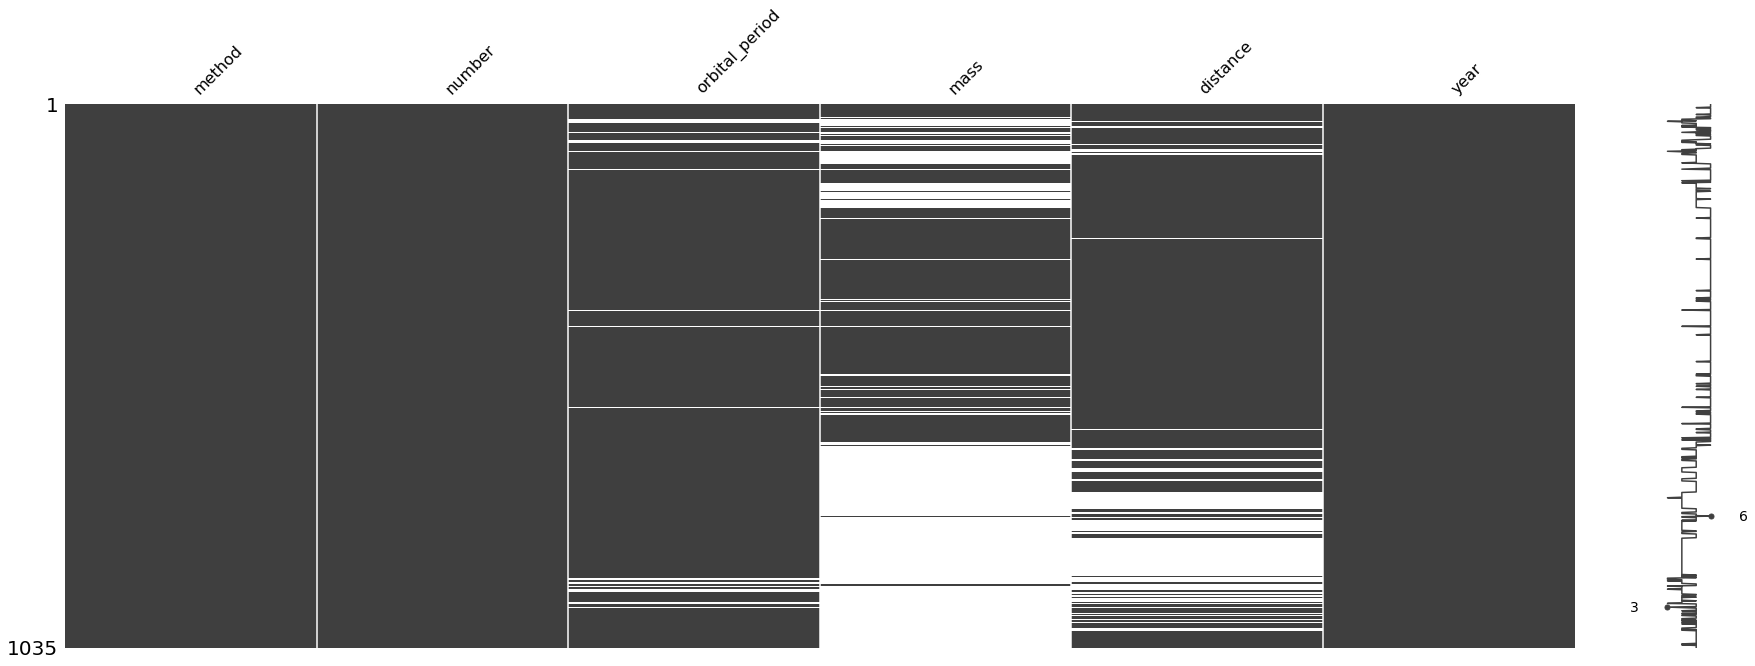

In [13]:
missingno.matrix(planets, figsize = (30,10));

In [14]:
# Take the most sparse column
print(planets.isnull().head(5) )# opposite is notnull()
print(planets.notnull().head(5) )#

   method  number  orbital_period   mass  distance   year
0   False   False           False  False     False  False
1   False   False           False  False     False  False
2   False   False           False  False     False  False
3   False   False           False  False     False  False
4   False   False           False  False     False  False
   method  number  orbital_period  mass  distance  year
0    True    True            True  True      True  True
1    True    True            True  True      True  True
2    True    True            True  True      True  True
3    True    True            True  True      True  True
4    True    True            True  True      True  True


In [15]:
planets.dropna()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


Full table 1035
After dropping NaN 513


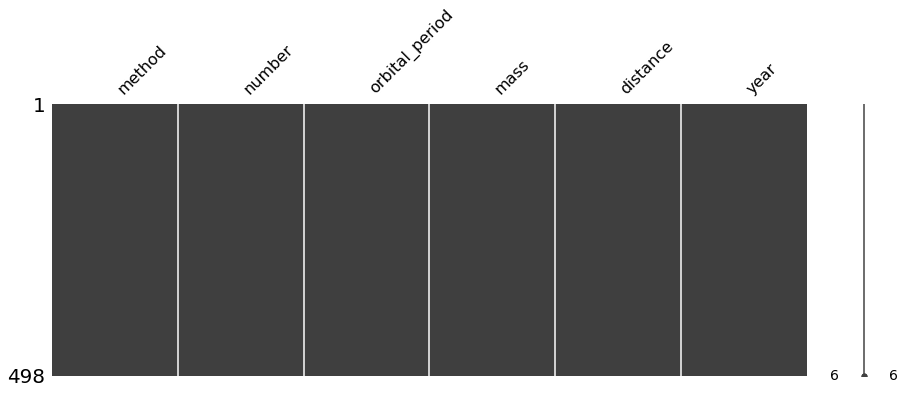

In [16]:
# drop nan
print('Full table', len(planets['mass']))
print('After dropping NaN', len(planets['mass'].dropna()))

# drop rows with nan
missingno.matrix(planets.dropna(), figsize = (15,5));

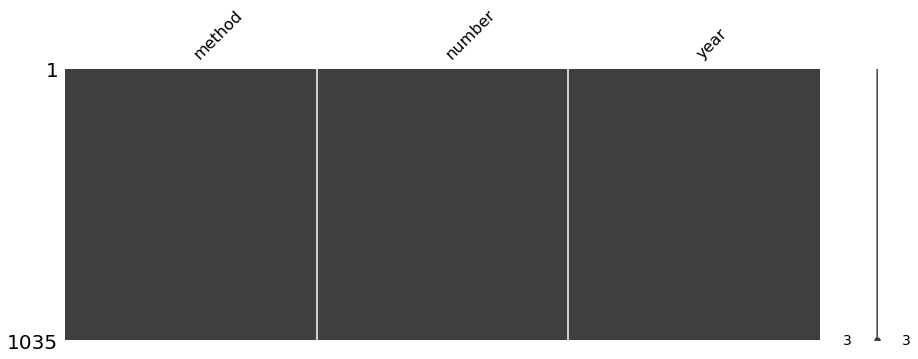

In [17]:
# drop columns with nan
missingno.matrix(planets.dropna(axis='columns'), figsize = (15,5));

In [18]:
# fill nan
planets.fillna(0).tail()    

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,0.0,172.0,2006
1031,Transit,1,2.615864,0.0,148.0,2007
1032,Transit,1,3.191524,0.0,174.0,2007
1033,Transit,1,4.125083,0.0,293.0,2008
1034,Transit,1,4.187757,0.0,260.0,2008


<AxesSubplot:>

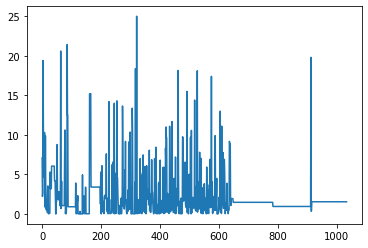

In [19]:
# forward-fill
planets.fillna(method='ffill')['mass'].plot()

<AxesSubplot:>

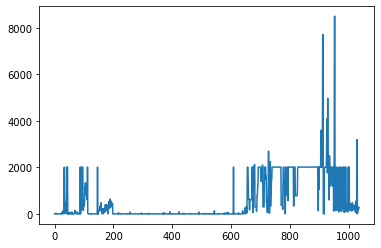

In [20]:
# back-fill
planets.fillna(method='bfill', axis=1)['mass'].plot()

### Exercise
Replace NaN with mean value via the column


In [21]:
print(planets.mean())

planets.replace(to_replace=np.nan, value=planets.mean())

number               1.785507
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
year              2009.070531
dtype: float64


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100000,77.40,2006
1,Radial Velocity,1,874.774000,2.210000,56.95,2008
2,Radial Velocity,1,763.000000,2.600000,19.84,2011
3,Radial Velocity,1,326.030000,19.400000,110.62,2007
4,Radial Velocity,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,2.638161,172.00,2006
1031,Transit,1,2.615864,2.638161,148.00,2007
1032,Transit,1,3.191524,2.638161,174.00,2007
1033,Transit,1,4.125083,2.638161,293.00,2008


In [22]:
# Why aren't the same??? 
df1=planets.replace(to_replace=np.nan, value = 0)
df2= planets.fillna(0)

df1 is df2

False

## Sorting and filtering tables

https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/

In [23]:
# sort by a column
planets.sort_values('distance')

,method,number,orbital_period,mass,distance,year
46,Radial Velocity,1,3.235700,0.0036,1.35,2012
48,Radial Velocity,1,2502.000000,1.5500,3.22,2000
136,Radial Velocity,1,4.693800,0.0350,4.54,2007
145,Radial Velocity,4,124.260000,0.0460,4.70,2010
143,Radial Velocity,4,30.088100,0.7142,4.70,2000
...,...,...,...,...,...,...
989,Transit,1,3.161575,NaN,NaN,2011
997,Transit,1,2.423804,NaN,NaN,2011
998,Transit,1,3.126088,NaN,NaN,2011
999,Transit,1,1.430370,NaN,NaN,2011


In [24]:
# set new column as index
df1 = planets.set_index('year')
df1.sort_index()

,method,number,orbital_period,mass,distance
year,,,,,
1989,Radial Velocity,1,83.888000,11.680,40.57
1992,Pulsar Timing,3,66.541900,NaN,NaN
1992,Pulsar Timing,3,25.262000,NaN,NaN
1994,Pulsar Timing,3,98.211400,NaN,NaN
1995,Radial Velocity,1,4.230785,0.472,15.36
...,...,...,...,...,...
2014,Transit,2,15.965400,NaN,NaN
2014,Transit,2,179.612000,NaN,NaN
2014,Transit,4,6.164860,NaN,NaN


In [25]:
# filtering by index
planets.loc[planets.mass>5] # same as planets[planets.mass>5]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
8,Radial Velocity,1,993.300,10.30,73.10,2008
11,Radial Velocity,1,335.100,9.88,39.43,2009
...,...,...,...,...,...,...
620,Radial Velocity,1,745.700,5.30,307.69,2011
636,Radial Velocity,1,124.600,9.18,149.25,2013
637,Radial Velocity,1,17337.500,9.00,23.98,2009
638,Radial Velocity,1,511.098,8.82,31.33,2002


In [26]:
# filtering
planets[planets['method']=='Radial Velocity']

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.3000,7.10,77.40,2006
1,Radial Velocity,1,874.7740,2.21,56.95,2008
2,Radial Velocity,1,763.0000,2.60,19.84,2011
3,Radial Velocity,1,326.0300,19.40,110.62,2007
4,Radial Velocity,1,516.2200,10.50,119.47,2009
...,...,...,...,...,...,...
914,Radial Velocity,1,6.9580,0.34,NaN,2014
915,Radial Velocity,1,5.1180,0.40,NaN,2014
916,Radial Velocity,1,121.7100,1.54,NaN,2014
939,Radial Velocity,1,4.4264,NaN,NaN,2012


In [27]:
#nsmallest() and nlargest()
planets.nsmallest(3, 'mass', keep='last')

,method,number,orbital_period,mass,distance,year
46,Radial Velocity,1,3.23570,0.00360,1.35,2012
128,Radial Velocity,4,3.14942,0.00600,6.27,2005
263,Radial Velocity,3,40.11400,0.00755,6.06,2011


In [28]:
# Parameters

# ascending=False
# na_position='first'
# inplace=True

## GroupBy: Split, Apply, Combine
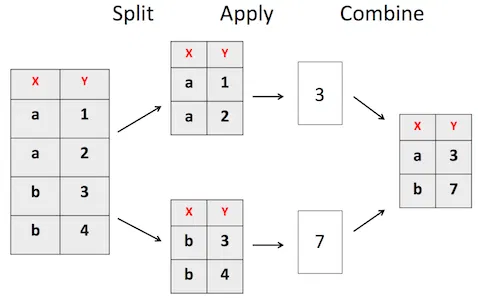

**Aggregation functions**
- count() Total number of items
- first(), last() First and last item
- mean(), median() Mean and median
- min(), max() Minimum and maximum
- std(), var() Standard deviation and variance
- mad() Mean absolute deviation
- prod() Product of all items
- sum() Sum of all items

In [41]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [30]:
# General information
planets.describe()

# BTW, what is 25% and 75% mean? 

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [31]:
planets.mean()

number               1.785507
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
year              2009.070531
dtype: float64

In [45]:
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [46]:
# GroupBy: Split, Apply, Combine
planets.groupby('method')

In [47]:
planets.groupby('method').mean()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.000000,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.666667,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.666667,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.721519,823.354680,2.630699,51.600208,2007.518987
Transit,1.954660,21.102073,1.470000,599.298080,2011.236776


In [48]:
# column indexing -- results in Series
planets.groupby('method')['orbital_period'].std()

method
Astrometry                          544.217663
Eclipse Timing Variations          2499.130945
Imaging                          213978.177277
Microlensing                       1113.166333
Orbital Brightness Modulation         0.725493
Pulsar Timing                     16313.265573
Pulsation Timing Variations                NaN
Radial Velocity                    1454.926210
Transit                              46.185893
Transit Timing Variations            71.599884
Name: orbital_period, dtype: float64

In [49]:
# describe data of the one column
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [50]:
# agregate method
planets.groupby('year').aggregate(['min', np.median, max])

number            orbital_period                                 mass  \
        min median max            min      median            max       min   
year                                                                         
1989      1      1   1      83.888000   83.888000      83.888000  11.68000   
1992      3      3   3      25.262000   45.901950      66.541900       NaN   
1994      3      3   3      98.211400   98.211400      98.211400       NaN   
1995      1      1   1       4.230785    4.230785       4.230785   0.47200   
1996      1      2   5       3.313500   65.669700    1078.000000   0.68760   
1997      1      1   1      39.845000   39.845000      39.845000   1.04000   
1998      1      2   4       3.097000   58.112890     442.100000   0.52000   
1999      1      1   4       3.510000  256.780000    3810.000000   0.42000   
2000      1      1   4       3.024000  179.665000    2502.000000   0.24900   
2001      1      1   3       6.276000  462.790000    2391.000000   0.54000   
2002      1      1   5       1.211919  505.549000    4909.000000   0.11500   
2003      1      1   3       1.328300  441.470000   36525.000000   0.22900   
2004      1      1   5       1.432475   35.103500    4205.800000   0.08700   
2005      1      1   4       1.937780   68.630000    4270.000000   0.00600   
2006      1      1   4       1.796000  233.150000  730000.000000   0.03300   
2007      1      1   5       1.306186  311.665000    1333.000000   0.03500   
2008      1      1   6       1.091423  226.930000  318280.000000   0.01260   
2009      1      1   3       0.788840  464.700000   17337.500000   0.01600   
2010      1      1   6       1.212884   16.278350   18000.000000   0.01300   
2011      1      2   6       0.090706   20.219180   40000.000000   0.00755   
2012      1      2   6       0.742960   11.738714    6005.000000   0.00360   
2013      1      2   7       0.355000   24.806000    4100.000000   0.00800   
2014      1      2   5       0.669310   12.815900    3827.000000   0.34000   

                      distance                    
       median     max      min   median      max  
year                                              
1989  11.6800  11.680    40.57   40.570    40.57  
1992      NaN     NaN      NaN      NaN      NaN  
1994      NaN     NaN      NaN      NaN      NaN  
1995   0.4720   0.472    15.36   15.360    15.36  
1996   1.6650   3.900    12.53   14.840    21.41  
1997   1.0400   1.040    17.43   17.430    17.43  
1998   1.3900   8.020     4.70   21.290    47.92  
1999   1.9855   8.440    10.91   29.760    59.03  
2000   1.4150  18.100     3.22   32.865    80.00  
2001   2.0700  10.350    14.08   33.650    77.82  
2002   2.2500  17.400    12.53   37.440   121.36  
2003   1.8250  18.370    11.11   35.955   133.16  
2004   1.7900   3.690    10.23   48.950  2500.00  
2005   0.5610  14.000     4.70   35.870   300.30  
2006   0.9435   7.600     8.77   46.940  8500.00  
2007   2.2150  19.800     4.54   80.580  2000.00  
2008   1.9900  25.000     4.94   56.070   680.00  
2009   1.7800  21.420     8.52   52.830   550.00  
2010   0.6000  13.000     4.70   90.000  2700.00  
2011   0.1200  13.650     6.06   87.870  2250.00  
2012   2.3700  11.100     1.35  200.000  7720.00  
2013   0.9665  20.600     6.80  132.000  7560.00  
2014   0.4800   2.580    20.48  272.000  1056.00

In [37]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


**filter, transform, apply**

In [84]:
def filter_func(x):
    return x['mass'].mean()>2

print(planets.groupby('year').filter(filter_func))

#and now with lambda
print(planets.groupby('year').filter(lambda x: x['mass'].mean()>2))

               method  number  orbital_period   mass  distance  year
1     Radial Velocity       1      874.774000   2.21     56.95  2008
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
5     Radial Velocity       1      185.840000   4.80     76.39  2008
6     Radial Velocity       1     1773.400000   4.64     18.15  2002
...               ...     ...             ...    ...       ...   ...
1029          Imaging       1             NaN    NaN     10.10  2012
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[628 rows x 6 columns]
               method  number  orbital_period   mass  distance  year
1     Radial Velocity       1      874.774000   2.21     56.95  2008
3     Radi

Transform vs. apply: similar but different

    (1) transform() works with function, a string function, a list of functions, and a dict. However, apply() is only allowed with function.
    (2) transform() cannot produce aggregated results.
    (3) apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

In [57]:
# transform - remains the index and doesn't reduce the table 
planets.groupby('method').transform(lambda x: x - x.sum())

,number,orbital_period,mass,distance,year
0,-951,-455045.838049,-1334.55638,-27270.71,-1108152
1,-951,-454440.364049,-1339.44638,-27291.16,-1108150
2,-951,-454552.138049,-1339.05638,-27328.27,-1108147
3,-951,-454989.108049,-1322.25638,-27237.49,-1108151
4,-951,-454798.918049,-1331.15638,-27228.64,-1108149
...,...,...,...,...,...
1030,-775,-8373.581344,NaN,-134070.77,-796455
1031,-775,-8374.906986,NaN,-134094.77,-796454
1032,-775,-8374.331327,NaN,-134068.77,-796454
1033,-775,-8373.397768,NaN,-133949.77,-796453


In [58]:
planets.groupby('method').apply(lambda x: x - x.sum())

,number,orbital_period,mass,distance,year
0,-951.0,-455045.838049,-1334.55638,-27270.71,-1108152.0
1,-951.0,-454440.364049,-1339.44638,-27291.16,-1108150.0
2,-951.0,-454552.138049,-1339.05638,-27328.27,-1108147.0
3,-951.0,-454989.108049,-1322.25638,-27237.49,-1108151.0
4,-951.0,-454798.918049,-1331.15638,-27228.64,-1108149.0
...,...,...,...,...,...
1030,-775.0,-8373.581344,NaN,-134070.77,-796455.0
1031,-775.0,-8374.906986,NaN,-134094.77,-796454.0
1032,-775.0,-8374.331327,NaN,-134068.77,-796454.0
1033,-775.0,-8373.397768,NaN,-133949.77,-796453.0


In [68]:
# apply() method for an arbitary function:  as a map() function in Python
def func(num):
    if number<10:
        return "Low"
  
    elif number>= 10 :
        return "Normal"


# print(planets.groupby('mass').mean())
planets.groupby('method').apply(lambda x: x['distance'].mean())

method
Astrometry                         17.875000
Eclipse Timing Variations         315.360000
Imaging                            67.715937
Microlensing                     4144.000000
Orbital Brightness Modulation    1180.000000
Pulsar Timing                    1200.000000
Pulsation Timing Variations              NaN
Radial Velocity                    51.600208
Transit                           599.298080
Transit Timing Variations        1104.333333
dtype: float64

In [62]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### Exersice
1) See all years where the planets was discovered 

2) Take the most fruitful year 

3) Which year is it?

## Dealing with dates  and times

https://pandas.pydata.org/docs/user_guide/timeseries.html#overview
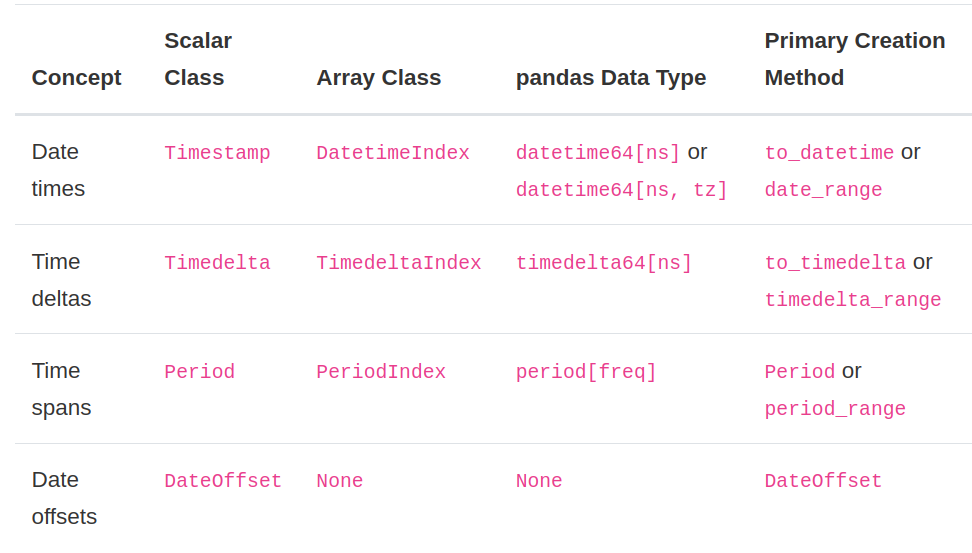

In [70]:
df['Peak Brightness Date/Time (UT)']

0      2020-11-07 21:27:04
1      2020-10-26 15:09:10
2      2020-10-23 20:51:39
3      2020-10-22 17:39:33
4      2020-10-21 18:57:33
              ...         
842    1993-11-29 17:48:41
843    1993-10-31 03:39:27
844    1991-10-04 09:22:47
845    1990-10-01 03:51:47
846    1988-04-15 03:03:10
Name: Peak Brightness Date/Time (UT), Length: 847, dtype: object

**datetime object**

https://pandas.pydata.org/pandas-docs/stable/reference/index.html 

In [74]:
pd.to_datetime(df['Peak Brightness Date/Time (UT)']).dt.year  

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
842    1993
843    1993
844    1991
845    1990
846    1988
Name: Peak Brightness Date/Time (UT), Length: 847, dtype: int64

Timestamp is the pandas equivalent of python’s Datetime

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

In [78]:
t = '08:22:41'
t = '08/12/20'
pd.Timestamp(t, unit='y').day_of_week #tz_localize("US/Pacific")

2

In [79]:
jd = 2459191.8490856481
pd.Timestamp(jd)

Timestamp('1970-01-01 00:00:00.002459191')

In [ ]:
# pd.to_timedelta(df['Peak Brightness Date/Time (UT)'])

In [ ]:
# create a range of dates as indexes 
# pandas.date_range(start=None, end=None, periods=None, 
#                   freq=None, tz=None, normalize=False, 
#                   name=None, closed=None, **kwargs)

pd.date_range(start='1/1/2021', end='1/08/2022', periods = 5)

## Visualization in Pandas

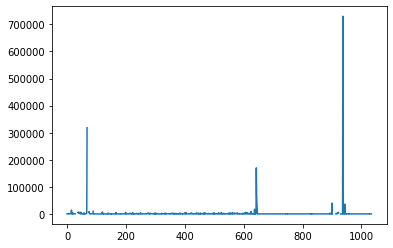

In [82]:
planets['orbital_period'].plot();

<AxesSubplot:xlabel='method'>

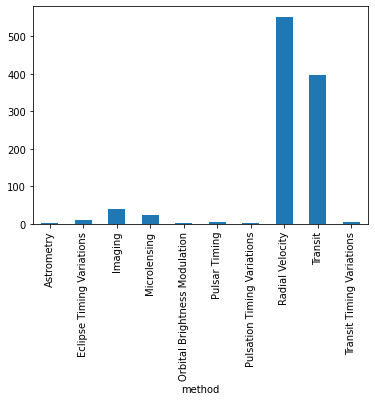

In [83]:
planets.groupby('method').count()['number'].plot.bar()

In [ ]:
# # additional
# import matplotlib.pyplot as plt

# sns.set(style="ticks")

# # Initialize the figure with a logarithmic x axis
# f, ax = plt.subplots(figsize=(7, 6))
# ax.set_xscale("log")

# # Plot the orbital period with horizontal boxes
# sns.boxplot(x="distance", y="method", data=planets,
#             whis="range", palette="vlag")

# # Add in points to show each observation
# sns.swarmplot(x="distance", y="method", data=planets,
#               size=2, color=".3", linewidth=0)

# # Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True);

## Multiindex or hierarchical 

## Combining tables

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://realpython.com/pandas-merge-join-and-concat/


**There are 3 ways to combine tables**
- merge() for combining data on common columns or indices
- .join() for combining data on a key column or an index
- concat() for combining DataFrames across rows or columns


### Concatenate

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1'],
                    'B': ['B0', 'B1'],},
                    index=[0, 1])

df2 = pd.DataFrame({'A': ['A2', 'A3'],
                    'B': ['B2', 'B3'],},
                    index=[2, 3])

frames = [df1, df2]
pd.concat(frames)

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1'],
                    'B': ['B0', 'B1'],},
                    index=[0, 1])

df2 = pd.DataFrame({'C': ['C0', 'C1'],
                    'D': ['D0', 'D1'],},
                    index=[0, 1])

frames = [df1, df2]
pd.concat(frames, axis='columns')

## With join 

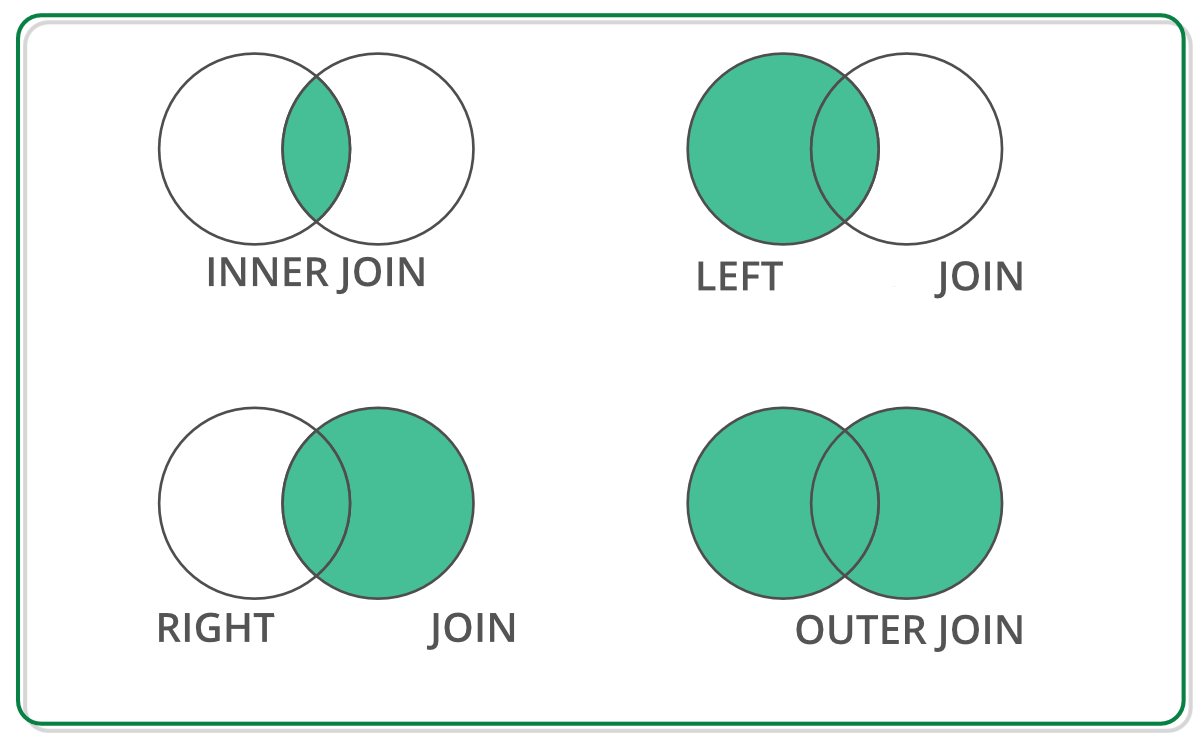

In [ ]:
# one-to-one joins: for example when joining two DataFrame objects on their indexes (which must contain unique values)
# many-to-one joins: for example when joining an index (unique) to one or more columns in a DataFrame
# many-to-many joins: joining columns on columns.


In [ ]:
arr1 = np.array([1, 2, 3, 2, 3, 4, 4, 5, 6])
# arr2 = np.array([[0, 0, 0], [0, 0, 4], [4, 5, 6]])
arr2 = arr1.copy()
arr3 = arr1.view()

print(arr1.flags['OWNDATA'])
print(arr2.flags)
print(arr3.flags)

In [ ]:
print(arr1.base)

In [ ]:
# Copy or view? 

df = pd.DataFrame([[1,2,3,4],[5,6,7,8]], index = ['row1','row2'], 
        columns = ['a','b','c','d'])
df2 = df.iloc[0:2, :]
df3 = df.loc[df['a'] == 1, :]

# df is neither copy nor view
print('df is neither copy nor view')
print(df._is_view, df._is_copy)

# df2 is a view AND a copy
print('\ndf2 is a view AND a copy')
print(df2._is_view, df2._is_copy)

# df3 is not a view, but a copy
print('\ndf3 is not a view, but a copy')
print(df3._is_view, df3._is_copy)
